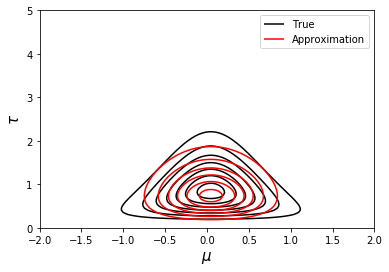

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as g

# Regular NGa - pdf, used to describe the exact posterior for mu and tau
def normalGamma(m, l, a, b):
    C = (b**a)*np.sqrt(l) / (g(a) * np.sqrt(2*np.pi))
    return lambda x, tau: C * tau**(a-0.5) * np.exp(-b*tau - 0.5*l*tau*(x-m)**2)

# Precision prior
def gamma(a,b):
    C = b**a/g(a)
    return lambda tau: C * tau**(a-1)*np.exp(-b*tau)

# Mean prior
def normal(mu,sigma):
    C = np.sqrt(2*np.pi*sigma**2)
    return lambda m: C * np.exp(-(m-mu)**2*0.5/sigma**2)

# VI approximated posterior
def vi(a,b,mu,l):
    return lambda x, tau: normal(mu,1./np.sqrt(l))(x)*gamma(a,b)(tau)

np.random.seed(1)
N = 5

# Generate Gaussian univariate samples
X  = np.random.normal(0, 1, N) 
m  = np.mean(X)
v  = np.var(X)

# Initialize prior
a_0 = 1; b_0 = 1; l_0 = 1; mu_0 = 0

# Calculate true posterior
a_t  = a_0 + N/2
l_t  = l_0 + N 
mu_t = (l_0*mu_0 + N*m) / (l_0 + N)
b_t  = b_0 + 1./2*(N*v + (l_0*N*(m - mu_0)**2)/(l_0 + N))
x = np.linspace(-2, 2, 100)
y = np.linspace(0, 5, 100)
Z1 = normalGamma(mu_t, l_t, a_t, b_t)(*np.meshgrid(x, y))

# VI - parameters
mu_v = (l_0*mu_0 + N*m)/(l_0 + N)
a_v  = a_0 + (N+1)/2.

# Initial guess
l_v = 1

# 100 iterations which strongly suggested convergence after some testing
for _ in range(100): 
        b_v  = b_0 + 0.5 * ((l_0 + N) * (1./l_v + mu_v**2)
                            - 2 * (l_0 * mu_0 + N*m) * mu_v 
                            + np.sum(X**2) + l_0*mu_0**2)        
        l_v  = (l_0 + N)*(a_v/b_v)
        
# Plotting
fig, ax = plt.subplots()
Z2 = vi(a_v, b_v, mu_v, l_v)(*np.meshgrid(x, y))        
cntr1 = ax.contour(x, y, Z1, colors='k')
cntr2 = ax.contour(x, y, Z2, colors='r')
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
ax.legend([h1[0], h2[0]], ['True', 'Approximation'])
ax.set_xlabel('$\mu$', fontsize=15)
ax.set_ylabel('$\\tau$', fontsize=15)
plt.savefig('Case3a.eps', bbox_inches='tight')
plt.show()

In [2]:
Z2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.45938893e-08, 3.97011751e-08, 6.34792473e-08, ...,
        1.78909214e-07, 1.14361016e-07, 7.24061677e-08],
       [1.59932165e-07, 2.58173680e-07, 4.12800650e-07, ...,
        1.16343282e-06, 7.43680868e-07, 4.70851724e-07],
       ...,
       [5.16332661e-11, 8.33500270e-11, 1.33270538e-10, ...,
        3.75608223e-10, 2.40093492e-10, 1.52012025e-10],
       [4.32823904e-11, 6.98694598e-11, 1.11716107e-10, ...,
        3.14859450e-10, 2.01262114e-10, 1.27426450e-10],
       [3.62708064e-11, 5.85508708e-11, 9.36185188e-11, ...,
        2.63853406e-10, 1.68658410e-10, 1.06783846e-10]])

In [27]:
'''
# Update VI parameters 4 times (approximate convergance)
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))
iter_ = 1

for i in range (2):
    for j in range (3):
        
        iter_ = iter_ + 1
        
        b_v  = b_0 + 0.5 * ((l_0 + N) * (1./l_v + mu_v**2)
                            - 2 * (l_0 * mu_0 + N*m) * mu_v 
                            + np.sum(X**2) + l_0*mu_0**2)        
        
        l_v  = (l_0 + N)*(a_v/b_v)
        
        Z2 = vi(a_v, b_v, mu_v, l_v)(*np.meshgrid(x, y))
        axes[i, j].contour(x, y, Z2, colors='r')
        axes[i, j].contour(x, y, Z1, colors='k')
        axes[i,j].set_title('Iteration '+ str(iter_), fontdict={'fontsize': 15, 'fontweight': 'medium'})

plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.05, '$\mu$', ha='right')
fig.text(0.04, 0.5, '$\\tau$', va='center', rotation='vertical')
'''

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.95196040e-34,   2.95658469e-34,   2.96120058e-34, ...,
          3.35155885e-34,   3.34800915e-34,   3.34444554e-34],
       [  1.69274462e-31,   1.69805219e-31,   1.70335841e-31, ...,
          2.18204693e-31,   2.17742728e-31,   2.17279446e-31],
       ..., 
       [  4.92125755e-59,   1.07135824e-58,   2.32623359e-58, ...,
          1.24402211e-31,   7.34686596e-32,   4.32749050e-32],
       [  3.96976645e-59,   8.65572343e-59,   1.88234612e-58, ...,
          1.13933984e-31,   6.72151370e-32,   3.95492805e-32],
       [  3.20211689e-59,   6.99286900e-59,   1.52310206e-58, ...,
          1.04342643e-31,   6.14915473e-32,   3.61430180e-32]])

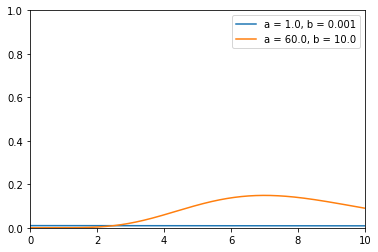

In [7]:
x = np.linspace(0, 10, 600)
plt.axis((0,10,0,1))

a_i = [1.0, 8.0]
b_i = [0.01, 1.0]

for i in range(len(a_i)):
    y = gamma(a_i[i],b_i[i])(x)
    plt.plot(x,y)

plt.legend(["a = 1.0, b = 0.001",
            "a = 60.0, b = 10.0",])
plt.savefig('Gamma1.eps', bbox_inches='tight')
plt.show()

In [100]:
np.mean(Z1[1])

5.1676937936788628e-138